In [ ]:
# The following code includes SVM classifier
# best parameters are identified using grid search with cross validation

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print (os.getcwd())
os.chdir("C:\Digital Nest\Decision Trees")

C:\Digital Nest\Decision Trees


In [2]:
churn = pd.read_csv('Churn.csv')
churn.head()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
# target class ratio
np.unique(churn.Churn,return_counts=True)

(array([0, 1], dtype=int64), array([2850,  483], dtype=int64))

In [4]:
2850/(2850+483)

0.8550855085508551

In [5]:
churn.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'State', 'AreaCode',
       'Phone'], dtype=object)

In [6]:
# check if any NA values
churn.isnull().values.any()

False

In [7]:
# find out corrleation between day charge and day minutes
np.corrcoef(churn.DayMins,churn.DayCharge)

array([[1.        , 0.99999995],
       [0.99999995, 1.        ]])

In [8]:
np.corrcoef(churn.EveMins,churn.EveCharge)

array([[1.        , 0.99999978],
       [0.99999978, 1.        ]])

In [9]:
np.corrcoef(churn.NightMins,churn.NightCharge)

array([[1.        , 0.99999921],
       [0.99999921, 1.        ]])

In [10]:
np.corrcoef(churn.IntlMins,churn.IntlCharge)

array([[1.        , 0.99999274],
       [0.99999274, 1.        ]])

In [11]:
np.corrcoef(churn.DayCalls,churn.DayCharge)

array([[1.        , 0.00675296],
       [0.00675296, 1.        ]])

In [12]:
# split the file into Independent and dependent variables
churnY = pd.DataFrame(churn,columns=["Churn"])
print(churnY.shape)
churnX = churn.copy()
churnX.drop(columns=['DayMins', 'EveMins', 'NightMins','IntlMins',
                     'Churn','Phone'],
            inplace=True)
print(churnX.shape)

(3333, 1)
(3333, 15)


In [13]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY, 
                                                    test_size = 0.20, 
                                                    random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2666, 15)
(2666, 1)
(667, 15)
(667, 1)


In [14]:
X_train.columns

Index(['AccountLength', 'VMailMessage', 'CustServCalls', 'IntlPlan',
       'VMailPlan', 'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge',
       'NightCalls', 'NightCharge', 'IntlCalls', 'IntlCharge', 'State',
       'AreaCode'],
      dtype='object')

In [15]:
contcols = ['AccountLength', 'VMailMessage', 'CustServCalls', 
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge',
       'NightCalls', 'NightCharge', 'IntlCalls', 'IntlCharge']
X_train_cont = pd.DataFrame(X_train,columns = contcols)
X_test_cont = pd.DataFrame(X_test,columns = contcols)
print(X_train_cont.shape)

(2666, 11)


In [16]:
# apply sclaing on continuous variables
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train_cont2 = SS.fit_transform(X_train_cont)
X_test_cont2 = SS.transform(X_test_cont)
print(X_train_cont2.shape)

(2666, 11)


In [17]:
# convert X_train3 as dataframe
X_train_cont2 = pd.DataFrame(X_train_cont2,columns=contcols)
X_test_cont2 = pd.DataFrame(X_test_cont2,columns=contcols)
print(X_train_cont2.head())

   AccountLength  VMailMessage  CustServCalls  DayCalls  DayCharge  EveCalls  \
0      -0.510130     -0.589441       1.097125  2.962041   0.334802 -0.653460   
1      -1.813562     -0.589441       1.097125 -0.667438  -0.217378 -0.403801   
2       0.492510     -0.589441       0.338190  0.973285   1.328509  0.295246   
3       0.116520     -0.589441      -0.420745 -0.617719   1.320915  0.145451   
4       0.843434      1.916153       0.338190  0.227502   1.239552  1.643408   

   EveCharge  NightCalls  NightCharge  IntlCalls  IntlCharge  
0  -0.879573   -1.214353    -0.379791  -0.605667   -0.336336  
1  -0.782731    0.602831    -0.173408  -0.605667   -0.046662  
2  -1.006391   -0.204806    -0.976985  -1.425524   -0.231000  
3  -0.519873    0.602831    -0.331489   0.214190   -1.718868  
4   0.469303   -1.214353    -0.296360   0.214190   -1.468696  


In [18]:
catcols = ['IntlPlan','VMailPlan', 'State','AreaCode']
X_train_cat = pd.DataFrame(X_train,columns = catcols)
X_test_cat = pd.DataFrame(X_test,columns = catcols)
print(X_train_cat.shape)
print(X_test_cat.shape)

(2666, 4)
(667, 4)


In [19]:
np.unique(churn.AreaCode,return_counts=True)

(array([408, 415, 510], dtype=int64), array([ 838, 1655,  840], dtype=int64))

In [20]:
np.unique(churn.State,return_counts=True)

(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([ 52,  80,  55,  64,  34,  66,  74,  54,  61,  63,  54,  53,  44,
         73,  58,  71,  70,  59,  51,  65,  70,  62,  73,  84,  63,  65,
         68,  68,  62,  61,  56,  68,  62,  66,  83,  78,  61,  78,  45,
         65,  60,  60,  53,  72,  72,  77,  73,  66,  78, 106,  77],
       dtype=int64))

In [23]:
# lable encoding for strings - state
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train_cat.State = le.fit_transform(X_train_cat.State)
X_test_cat.State = le.transform(X_test_cat.State)
print(X_train_cat.head())

      IntlPlan  VMailPlan  State  AreaCode
1460         0          0     26       415
2000         0          0     38       415
666          0          0     37       415
2962         0          0     41       415
2773         0          1     31       510


In [27]:
print(len(np.unique(X_train.IntlPlan,return_counts=False)))
print(len(np.unique(X_train.VMailPlan,return_counts=False)))
print(len(np.unique(X_train.State,return_counts=False)))
print(len(np.unique(X_train.AreaCode,return_counts=False)))

2
2
51
3


In [25]:
# apply one hot encoding on state and area
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(categories = 'auto', sparse = False, handle_unknown = 'ignore')
X_train_cat2 = OHE.fit_transform(X_train_cat)
X_test_cat2 = OHE.transform(X_test_cat)
print(X_train_cat2.shape)
print(X_test_cat2.shape)

(2666, 58)
(667, 58)


In [28]:
# convert array to data frame
X_train_cat2 = pd.DataFrame(X_train_cat2)
X_test_cat2 = pd.DataFrame(X_test_cat2)
print(X_train_cat2.head())

    0    1    2    3    4    5    6    7    8    9   ...   48   49   50   51  \
0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    52   53   54   55   56   57  
0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 58 columns]


In [29]:
# merge scaled continuous and onehotencoded categorical data
X_train_final = pd.concat([X_train_cont2,X_train_cat2],
                          axis=1,join='outer',sort=False,
                          ignore_index=True)
X_test_final = pd.concat([X_test_cont2,X_test_cat2],
                         axis=1,join='outer',sort=False,
                         ignore_index=True)
print(X_train_final.shape)
print(X_test_final.shape)

(2666, 69)
(667, 69)


In [39]:
# SVM
from sklearn.svm import SVC
SVM = SVC(class_weight='balanced',degree=2,probability=True)

# build grid search parameters
parms = {'C': [0.1,0.2],
         'gamma':[0.1],
         'kernel': ["rbf"]}
# perform grid search
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = SVM,param_grid = parms, scoring = 'f1_macro',
                  cv=3,refit=True,return_train_score = True,verbose=10)
CV.fit(X_train_final,Y_train.Churn)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=(train=0.779, test=0.716), total=   1.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=(train=0.763, test=0.736), total=   1.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=(train=0.765, test=0.736), total=   2.2s
[CV] C=0.2, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s remaining:    0.0s


[CV]  C=0.2, gamma=0.1, kernel=rbf, score=(train=0.830, test=0.753), total=   1.6s
[CV] C=0.2, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.4s remaining:    0.0s


[CV]  C=0.2, gamma=0.1, kernel=rbf, score=(train=0.814, test=0.771), total=   1.7s
[CV] C=0.2, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.3s remaining:    0.0s


[CV]  C=0.2, gamma=0.1, kernel=rbf, score=(train=0.820, test=0.764), total=   1.6s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=2,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2], 'gamma': [0.1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_macro', verbose=10)

In [36]:
CVResults = pd.DataFrame(CV.cv_results_)
CVResults.to_excel('CVResutls_SVM2.xlsx')

In [11]:
print(CV.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.005, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [40]:
print(CV.best_score_)
print(CV.best_params_)

0.7623367643201971
{'C': 0.2, 'gamma': 0.1, 'kernel': 'rbf'}


In [43]:
# Preidct on Test data and check the confusion matrix
predictProb = CV.predict_proba(X_test_final)
print(predictProb[0:5])
PProb = pd.DataFrame(predictProb,columns=["Class0","Class1"])
predictTest = CV.predict(X_test_final)
print(predictTest[0:5])

[[0.30404652 0.69595348]
 [0.96970701 0.03029299]
 [0.79583288 0.20416712]
 [0.99125895 0.00874105]
 [0.01845315 0.98154685]]
[1 0 1 0 1]


In [44]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[485  94]
 [ 19  69]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       579
           1       0.42      0.78      0.55        88

    accuracy                           0.83       667
   macro avg       0.69      0.81      0.72       667
weighted avg       0.89      0.83      0.85       667



In [45]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
# AUC for class 1
AUC = roc_auc_score(Y_test, PProb.Class1)
print(AUC)

0.8861477468990422


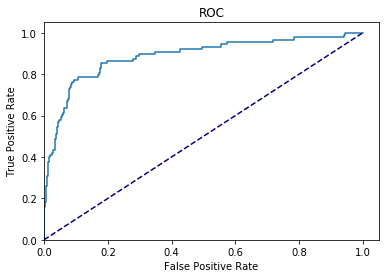

In [48]:
FPR, TPR, THR = roc_curve(Y_test, PProb.Class1)
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [49]:
ROC = pd.DataFrame({'THR': THR,
                    'TPR': TPR,
                    'FPR': FPR})
ROC.to_excel("ROC_SVM.xlsx",index=False)